In [28]:
#IMPORTS

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
from pathlib import Path


In [ ]:
#SET PROJECT FOLDER MAIN DIRECTORY
project_folder = Path.cwd().parent

#LOAD LOCAL_SETUP_CONFIG FILE
config_path = project_folder / "local_setup_config.json"
if config_path.exists():
    with open(config_path, "r", encoding="utf-8") as file:
        local_config  = json.load(file)
    print('Local configuration file loaded succesfully')
else:
    raise FileNotFoundError(f"Error: {config_path} not found")

# set run_local
run_local = local_config["run_local"]

<div align="center">
   <h1>ANÁLISIS DESCRIPTIVO</h1>
</div>

A continuación se presenta una descripción y visualización de los datos

In [ ]:
import os
import requests

file_path = os.path.join(os.getcwd(),r"linkedindatabase.db")
#file_path = r"linkedindatabase.db"

if not os.path.exists(file_path):
    print('Database not ready. Loading...')
    try:
        # URL of your Google Drive database file (direct download link)
        url = "https://drive.google.com/uc?id=1e_PSowuukgifVA7rzqkvhDuCud-YDxtN"
        # Send a GET request to download the file
        response = requests.get(url)
        # Save the content to a local file (in the Binder container or local disk)
        with open('linkedindatabase.db', 'wb') as f:
            f.write(response.content)
        print("Database available!")
    except Exception as e:
        print("Failed to fetch database: {e}")
else:
    print('Database already loaded!')

In [ ]:
#DATABASE CONNECTION
if run_local:
    linkedindatabase_path = project_folder / "database" / "linkedindatabase.db"
else:
    linkedindatabase_path = project_folder / "linkedindatabase.db"

if linkedindatabase_path.exists():
    conn = sqlite3.connect(linkedindatabase_path)
    print("Opened database successfully")
else:
    raise FileNotFoundError(f"Error: {linkedindatabase_path} not found")

In [26]:
#DATAFRAMES CREATION

#numerical data
df_num = pd.read_sql('SELECT * FROM clean_numerical_postings', conn)

df_num = df_num[df_num['max_salary'] <= 10000000]
df_num = df_num[df_num['min_salary'] <= 10000000]
df_num = df_num[df_num['normalized_salary'] <= 10000000]

df_num = df_num[df_num['max_salary'] > 100]
df_num = df_num[df_num['min_salary'] > 100]
df_num = df_num[df_num['normalized_salary'] > 100]

#postings
df_postings = pd.read_sql('SELECT * FROM postings', conn)

#companies
df_companies = pd.read_sql('SELECT * FROM companies', conn)

#industries
df_industries = pd.read_sql('SELECT * FROM industries', conn)

#job industries
df_job_industries = pd.read_sql('SELECT * FROM job_industries', conn)

#skills
df_skills = pd.read_sql('SELECT * FROM skills', conn)

#job skills
df_job_skills = pd.read_sql('SELECT * FROM job_skills', conn)



In [ ]:
#FUNCTIONS

#Convert dict to Markdown table
def dict_to_markdown(data):
    headers= "| " + " | ".join(data.keys()) + " |"
    separator = "| " + " | ".join(["---"]*len(data)) + " |"
    rows = []
    for i in range(len(next(iter(data.values())))):
        row = "| " + " | ".join(f"{data[key][i]:,}" if isinstance(data[key][i], float) else str(data[key][i])for key in data) + " |"
        rows.append(row)
    return "\n".join([headers, separator] + rows)

# Calcular coef. de asimetría de cada columna
def asim(col):
    # Calculamos la media de la columna
    media = col.mean()

    # Calculamos la desviacion estandar
    std = col.std()

    # Calculamos el 3er momento alrededor del centro
    momento_3 = ((col - media) ** 3).mean()

    asim = momento_3*(1/(std**3))
    return asim

## Análisis Estadístico Básico

se realiza un análisis estadístico básico para los siguientes atributos de cada publicación de trabajo:

* Rango Salarial ofrecido para el puesto
* Número de vistas
* Número de aplicaciones recibidas
* Duración de la publicación

se visualizan algunas medidas de centralización y de dispersión

### Rango salarial

In [27]:
nor_salary_insights = df_num[df_num['normalized_salary'].notnull()]
nor_salary_insights = nor_salary_insights.sort_values(by='normalized_salary', ascending=False)
nor_salary_insights = nor_salary_insights[nor_salary_insights['normalized_salary'] != 0]
nor_salary_insights.rename(columns={'normalized_salary': 'salary'}, inplace=True)
nor_salary_insights['category'] = 'normalized_salary'

max_salary_insights = df_num[df_num['max_salary'].notnull()]
max_salary_insights = max_salary_insights.sort_values(by='max_salary', ascending=False)
max_salary_insights = max_salary_insights[max_salary_insights['max_salary'] != 0]
max_salary_insights.rename(columns={'max_salary': 'salary'}, inplace=True)
max_salary_insights['category'] = 'max_salary'

min_salary_insights = df_num[df_num['min_salary'].notnull()]
min_salary_insights = min_salary_insights.sort_values(by='min_salary', ascending=False)
min_salary_insights = min_salary_insights[min_salary_insights['min_salary'] != 0]
min_salary_insights.rename(columns={'min_salary': 'salary'}, inplace=True)
min_salary_insights['category'] = 'min_salary'

salary_combined = pd.concat([nor_salary_insights, max_salary_insights, min_salary_insights], ignore_index=True)


#### Medidas de Centralización

In [132]:
#mean salary

mean_salary = nor_salary_insights['salary'].mean()
mean_salary_max = max_salary_insights['salary'].mean()
mean_salary_min = min_salary_insights['salary'].mean()

#median salary

median_salary = nor_salary_insights['salary'].median()
median_salary_max = max_salary_insights['salary'].median()
median_salary_min = min_salary_insights['salary'].median()

#mode salary

mode_salary = nor_salary_insights['salary'].mode()
mode_salary_max = max_salary_insights['salary'].mode()
mode_salary_min = min_salary_insights['salary'].mode()


cent_data = {
    'Medida': ['Promedio', 'Mediana', 'Moda'],
    'Salario medio': [int(mean_salary), median_salary, float(mode_salary[0])],
    'Salario máximo': [int(mean_salary_max), median_salary_max, float(mode_salary_max[0])],
    'Salario mínimo': [int(mean_salary_min), median_salary_min, float(mode_salary_min[0])]
}

markdown_table = dict_to_markdown(cent_data)



# Display Markdown table

display(Markdown(markdown_table))


| Medida | Salario medio | Salario máximo | Salario mínimo |
| --- | --- | --- | --- |
| Promedio | 103200 | 163578 | 127983 |
| Mediana | 90,000.0 | 104,000.0 | 78,200.0 |
| Moda | 100,000.0 | 150,000.0 | 100,000.0 |

#### Medidas de Dispersión

In [20]:
#varianza
var_salary = nor_salary_insights['salary'].var()
var_salary_max = max_salary_insights['salary'].var()
var_salary_min = min_salary_insights['salary'].var()

#desviacion estandar
std_salary = nor_salary_insights['salary'].std()
std_salary_max = max_salary_insights['salary'].std()
std_salary_min = min_salary_insights['salary'].std()

#max
max_salary = nor_salary_insights['salary'].max()
max_salary_max = max_salary_insights['salary'].max()
max_salary_min = min_salary_insights['salary'].max()
#min
min_salary = nor_salary_insights['salary'].min()
min_salary_max = max_salary_insights['salary'].min()
min_salary_min = min_salary_insights['salary'].min()
#rango
range_salary = max_salary - min_salary
range_salary_max = max_salary_max - min_salary_max
range_salary_min = max_salary_min - min_salary_min

#coef asimetria
asim_salary = asim(nor_salary_insights['salary'])
asim_salary_max = asim(max_salary_insights['salary'])
asim_salary_min = asim(min_salary_insights['salary'])

#curtosis
kurt_salary = nor_salary_insights['salary'].kurt()
kurt_salary_max = max_salary_insights['salary'].kurt()
kurt_salary_min = min_salary_insights['salary'].kurt()

disp_data = {
    'Medida': ['Varianza', 'Desviación Estándar', 'Rango', 'Coeficiente de Asimetría', 'Curtosis'],
    'Salario medio': [var_salary, std_salary, (min_salary,max_salary), asim_salary, kurt_salary],
    'Salario máximo': [var_salary_max, std_salary_max, (min_salary_max,max_salary_max), asim_salary_max, kurt_salary_max],
    'Salario mínimo': [var_salary_min, std_salary_min, (min_salary_min,max_salary_min), asim_salary_min, kurt_salary_min]
}

markdown_table = dict_to_markdown(disp_data)



# Display Markdown table

display(Markdown(markdown_table))

NameError: name 'nor_salary_insights' is not defined

#### Análisis Intercuartílico

#### Visualización

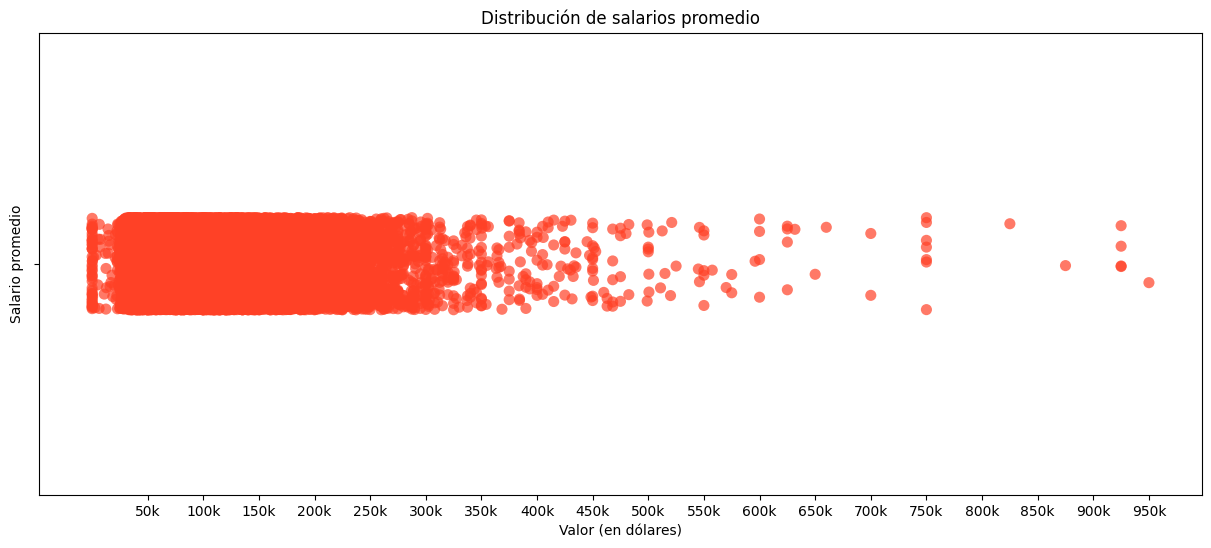

In [133]:
plt.figure(figsize=(15, 6))
sns.stripplot(x='salary', y='category', data=nor_salary_insights, jitter=True, size=8, hue='category',palette='CMRmap', alpha=0.7)

plt.xticks(ticks=np.arange(50000, 1000000, 50000), labels=[f'{int(i/1000):,}k' for i in np.arange(50000, 1000000, 50000)])
plt.yticks(ticks=[0], labels=[''])
plt.ylabel('Salario promedio')
plt.xlabel('Valor (en dólares)')
plt.title('Distribución de salarios promedio')

plt.show()

Los salarios tienden a concentrarse en valores bajos y medianos, con pocas ofertas de trabajo que superan los 400k dólares.
Hay algunos valores extremos en la parte derecha, lo que indica que existen salarios significativamente más altos, pero en menor cantidad.
La distribución sugiere que el mercado laboral tiene una gran cantidad de ofertas con salarios relativamente bajos, mientras que los salarios más altos son menos frecuentes.

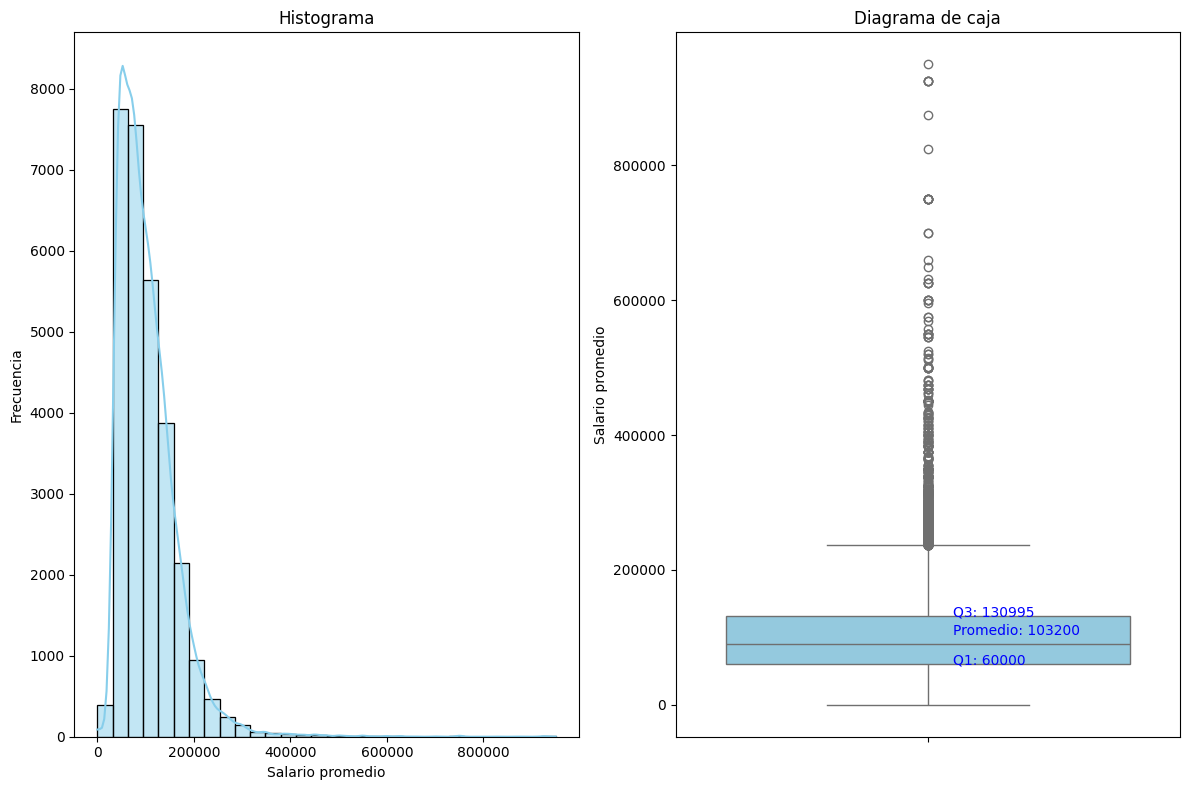

In [8]:
salary = df_num['normalized_salary'].dropna()

colors = sns.color_palette('viridis', 30)
# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.histplot(salary, kde=True, color='skyblue', bins=30)
plt.title('Histograma')
plt.xlabel('Salario promedio')
plt.ylabel('Frecuencia')

# Calculate mean and quartiles
mean_value = np.mean(salary)
q1 = np.percentile(salary, 25)
q3 = np.percentile(salary, 75)

# Plotting the boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=salary, color='skyblue', orient='v')
plt.title('Diagrama de caja')
plt.ylabel('Salario promedio')

# Annotate the mean and quartile values on the boxplot
plt.text(0.05, mean_value, f'Promedio: {mean_value:.0f}', color='blue', fontsize=10)
plt.text(0.05, q1, f'Q1: {q1:.0f}', color='blue', fontsize=10)
plt.text(0.05, q3, f'Q3: {q3:.0f}', color='blue', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

El histograma sugiere que la mayoría de los salarios se concentran en un rango específico, pero hay presencia de valores extremos.
El diagrama de caja confirma la presencia de valores atípicos y muestra la mediana y los cuartiles.

### Visitas

In [9]:
views = df_num['views'].dropna()

#### Medidas de Centralización

In [125]:
#mean views
mean_views = views.mean()

#median views
median_views = views.median()

#mode views
mode_views = views.mode()

cent_data = {
    'Medida': ['Promedio', 'Mediana', 'Moda'],
    'Número de vistas': [mean_views, median_views, mode_views[0]],
}

markdown_table = dict_to_markdown(cent_data)

# Display Markdown table

display(Markdown(markdown_table))


| Medida | Número de vistas |
| --- | --- |
| Promedio | 21.302978018565167 |
| Mediana | 5.0 |
| Moda | 4.0 |

#### Medidas de Dispersión

In [ ]:
#varianza
var_salary = nor_salary_insights['salary'].var()
var_salary_max = max_salary_insights['salary'].var()
var_salary_min = min_salary_insights['salary'].var()

#desviacion estandar
std_salary = nor_salary_insights['salary'].std()
std_salary_max = max_salary_insights['salary'].std()
std_salary_min = min_salary_insights['salary'].std()

#max
max_salary = nor_salary_insights['salary'].max()
max_salary_max = max_salary_insights['salary'].max()
max_salary_min = min_salary_insights['salary'].max()
#min
min_salary = nor_salary_insights['salary'].min()
min_salary_max = max_salary_insights['salary'].min()
min_salary_min = min_salary_insights['salary'].min()
#rango
range_salary = max_salary - min_salary
range_salary_max = max_salary_max - min_salary_max
range_salary_min = max_salary_min - min_salary_min

#coef asimetria
asim_salary = asim(nor_salary_insights['salary'])
asim_salary_max = asim(max_salary_insights['salary'])
asim_salary_min = asim(min_salary_insights['salary'])

#curtosis
kurt_salary = nor_salary_insights['salary'].kurt()
kurt_salary_max = max_salary_insights['salary'].kurt()
kurt_salary_min = min_salary_insights['salary'].kurt()

disp_data = {
    'Medida': ['Varianza', 'Desviación Estándar', 'Rango', 'Coeficiente de Asimetría', 'Curtosis'],
    'Salario medio': [var_salary, std_salary, (min_salary,max_salary), asim_salary, kurt_salary],
    'Salario máximo': [var_salary_max, std_salary_max, (min_salary_max,max_salary_max), asim_salary_max, kurt_salary_max],
    'Salario mínimo': [var_salary_min, std_salary_min, (min_salary_min,max_salary_min), asim_salary_min, kurt_salary_min]
}

markdown_table = dict_to_markdown(disp_data)



# Display Markdown table

display(Markdown(markdown_table))

#### Análisis Intercuartílico

#### Visualización

In [ ]:
views.get_c

In [16]:
df_views = df_num[views]
plt.figure(figsize=(15, 6))
sns.stripplot(x='views', data=df_views, jitter=True, size=8, hue='category',palette='CMRmap', alpha=0.7)

plt.xticks(ticks=np.arange(50000, 1000000, 50000), labels=[f'{int(i/1000):,}k' for i in np.arange(50000, 1000000, 50000)])
plt.yticks(ticks=[0], labels=[''])
plt.ylabel('Salario promedio')
plt.xlabel('Valor (en dólares)')
plt.title('Distribución de vistas')

plt.show()

KeyError: "None of [Index([20.0,  1.0,  8.0, 16.0,  3.0,  9.0,  7.0,  2.0,  3.0,  3.0,\n       ...\n        3.0,  2.0,  3.0,  2.0,  1.0,  1.0,  3.0,  1.0,  1.0,  2.0],\n      dtype='float64', length=28979)] are in the [columns]"

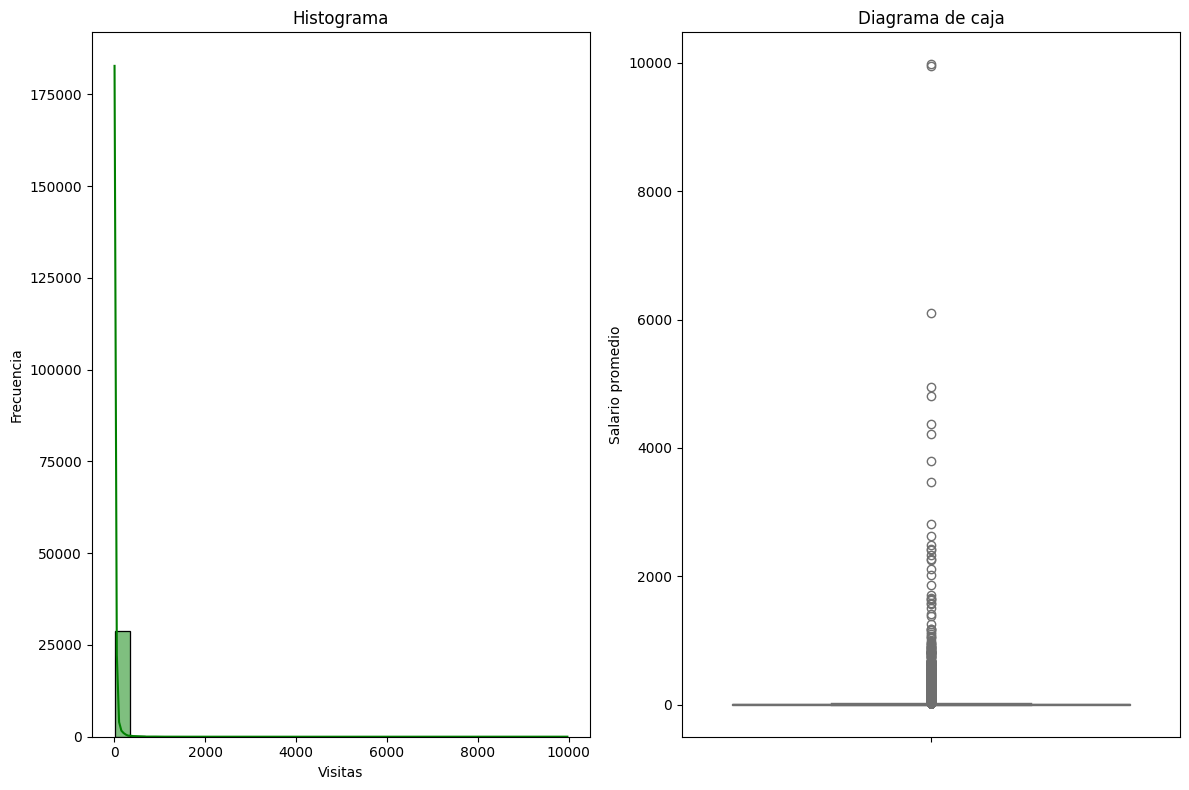

In [11]:
# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.histplot(views, kde=True, color='green', bins=30)
plt.title('Histograma')
plt.xlabel('Visitas')
plt.ylabel('Frecuencia')

# Calculate mean and quartiles
mean_value = np.mean(views)
q1 = np.percentile(views, 25)
q3 = np.percentile(views, 75)

# Plotting the boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=views, color='skyblue', orient='v')
plt.title('Diagrama de caja')
plt.ylabel('Salario promedio')

# Annotate the mean and quartile values on the boxplot
#plt.text(0.05, mean_value, f'Promedio: {mean_value:.0f}', color='blue', fontsize=10)
#plt.text(0.05, q1, f'Q1: {q1:.0f}', color='blue', fontsize=10)
#plt.text(0.05, q3, f'Q3: {q3:.0f}', color='blue', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


### Aplicaciones por puesto

In [13]:
apps = df_num['applies'].dropna()

#### Medidas de Centralización

In [128]:
#mean apps
mean_apps = apps.mean()

#median apps
median_apps = apps.median()

#mode apps
mode_apps = apps.mode()

cent_data = {
    'Medida': ['Promedio', 'Mediana', 'Moda'],
    'Número de aplicaciones': [int(mean_apps), median_apps, mode_apps[0]],
}

markdown_table = dict_to_markdown(cent_data)

# Display Markdown table

display(Markdown(markdown_table))

| Medida | Número de aplicaciones |
| --- | --- |
| Promedio | 12 |
| Mediana | 3.0 |
| Moda | 1.0 |

#### Medidas de Dispersión

#### Análisis Intercuartílico

#### Visualización

In [ ]:
plt.figure(figsize=(15, 6))
sns.stripplot(x='salary', y='category', data=views, jitter=True, size=8, hue='category',palette='CMRmap', alpha=0.7)

plt.xticks(ticks=np.arange(50000, 1000000, 50000), labels=[f'{int(i/1000):,}k' for i in np.arange(50000, 1000000, 50000)])
plt.yticks(ticks=[0], labels=[''])
plt.ylabel('Salario promedio')
plt.xlabel('Valor (en dólares)')
plt.title('Distribución de salarios promedio')

plt.show()

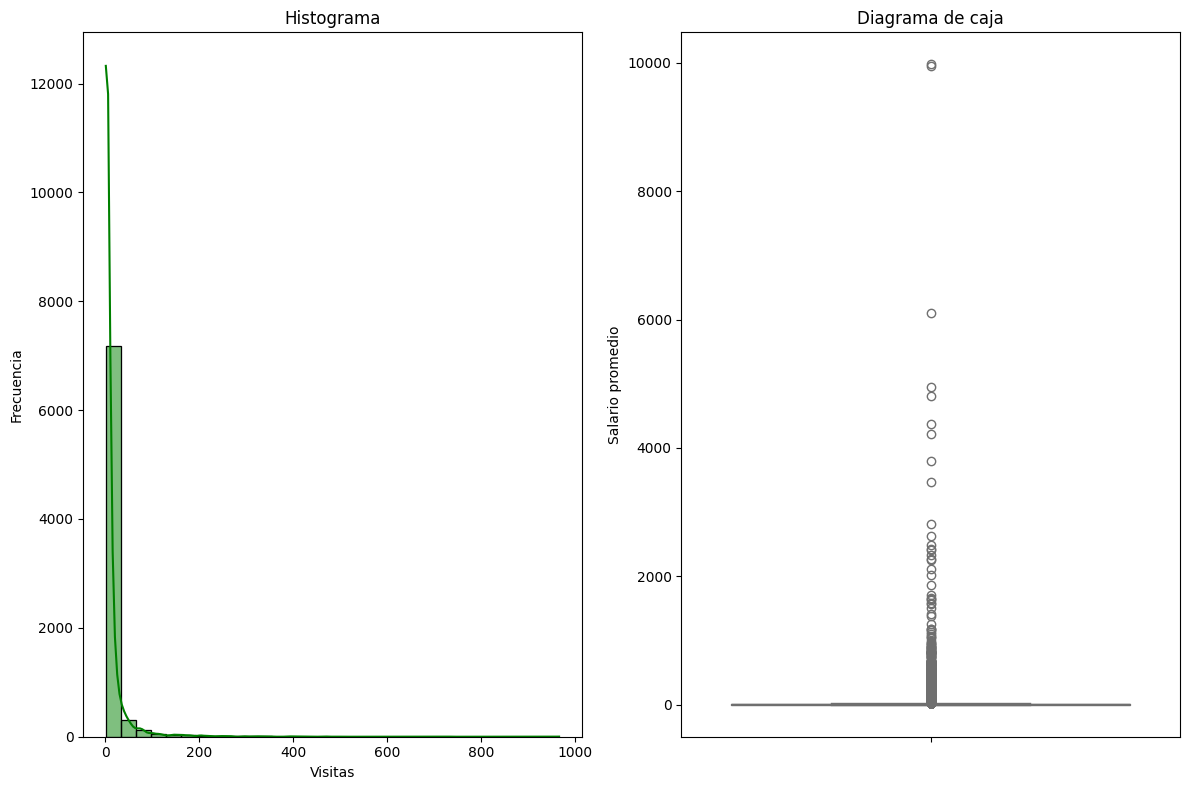

In [14]:
# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.histplot(apps, kde=True, color='green', bins=30)
plt.title('Histograma')
plt.xlabel('Visitas')
plt.ylabel('Frecuencia')

# Calculate mean and quartiles
mean_value = np.mean(apps)
q1 = np.percentile(apps, 25)
q3 = np.percentile(apps, 75)

# Plotting the boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=views, color='skyblue', orient='v')
plt.title('Diagrama de caja')
plt.ylabel('Salario promedio')

# Annotate the mean and quartile values on the boxplot
#plt.text(0.05, mean_value, f'Promedio: {mean_value:.0f}', color='blue', fontsize=10)
#plt.text(0.05, q1, f'Q1: {q1:.0f}', color='blue', fontsize=10)
#plt.text(0.05, q3, f'Q3: {q3:.0f}', color='blue', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

### Duración de la publicación

In [129]:
#get job duration values
def get_duration(row):
    if pd.notna(row['closed_time']):
        return row['closed_time'] - row['listed_time']
    else:
        return None

df_num['duration'] = df_num.apply(get_duration, axis=1)
duration = df_num['duration'].dropna()

#### Medidas de Centralización

In [130]:
#mean duration of postings
mean_duration = duration.mean()

#median duration of postings
median_duration = duration.median()

#mode duration of postings
mode_duration = duration.mode()

#convert unix time to days, hours, minutes
def convert_time(duration):
    days = duration//86400
    hours = (duration%86400)//3600
    minutes = (duration%3600)//60
    return days, hours, minutes


cent_data = {
    'Medida': ['Promedio', 'Mediana', 'Moda'],
    'Duración de la publicación': [mean_duration, median_duration, mode_duration[0]],
}

def dict_to_datetime_markdown(data):
    headers= "| " + " | ".join(data.keys()) + " |"
    separator = "| " + " | ".join(["---"]*len(data)) + " |"
    rows = []
    for i in range(len(next(iter(data.values())))):
        row = "| " + " | ".join(f"{int(convert_time(data[key][i])[0])}d{int(convert_time(data[key][i])[1])}h{convert_time(int(data[key][i]))[2]}" if isinstance(data[key][i], float) else str(data[key][i])for key in data) + " |"
        rows.append(row)
    return "\n".join([headers, separator] + rows)

markdown_table = dict_to_datetime_markdown(cent_data)

# Display Markdown table

display(Markdown(markdown_table))

| Medida | Duración de la publicación |
| --- | --- |
| Promedio | 34d17h0 |
| Mediana | 12d15h3 |
| Moda | 0d18h36 |

#### Medidas de Dispersión

In [ ]:
#varianza
#desviacion estandar
#rango
#coef asimetria
#curtosis

#### Análisis Intercuartílico

In [ ]:
#iqr rango intercuartil
#q1 25
#q2 50
#q3 75

In [ ]:
def get_cuartiles_iqr(columna):
    # Verificamos si la columna existe en el DataFrame
    if columna not in data.columns:
        print(f"La columna '{columna}' no se encuentra en el DataFrame.")
        return

    # Calculamos los cuartiles
    Q1 = data[columna].quantile(0.25)
    Q2 = data[columna].quantile(0.50)  # Mediana
    Q3 = data[columna].quantile(0.75)

    # Calculamos el Rango Intercuartílico (IQR)
    IQR = Q3 - Q1

    # Devolvemos los resultados como un diccionario
    resultado = {
        'Q1': Q1,
        'Q2': Q2,
        'Q3': Q3,
        'IQR': IQR
    }

    return resultado

# Calcular cuartiles de cada columna
quarts = {}
for x in data.columns:
    quarts[x] = get_cuartiles_iqr(x)

# Mostrar cuartiles e IQR  de todas las columnas
print("Cuartiles y Rango Intercuartil (IQR):")
for columna, curt in curts.items():
    print(f"{columna}:")
    print(f"\t IQR = {quarts[columna]['IQR']}")
    print(f"\t Q1 (25%)= {quarts[columna]['Q1']}")
    print(f"\t Q2 (50%)= {quarts[columna]['Q2']}")
    print(f"\t Q3 (75%)= {quarts[columna]['Q3']}")

#### Visualización

In [ ]:
plt.figure(figsize=(15, 6))
sns.stripplot(x='salary', y='category', data=views, jitter=True, size=8, hue='category',palette='CMRmap', alpha=0.7)

plt.xticks(ticks=np.arange(50000, 1000000, 50000), labels=[f'{int(i/1000):,}k' for i in np.arange(50000, 1000000, 50000)])
plt.yticks(ticks=[0], labels=[''])
plt.ylabel('Salario promedio')
plt.xlabel('Valor (en dólares)')
plt.title('Distribución de salarios promedio')

plt.show()

In [ ]:
# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.histplot(apps, kde=True, color='green', bins=30)
plt.title('Histograma')
plt.xlabel('Visitas')
plt.ylabel('Frecuencia')

# Calculate mean and quartiles
mean_value = np.mean(apps)
q1 = np.percentile(apps, 25)
q3 = np.percentile(apps, 75)

# Plotting the boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=views, color='skyblue', orient='v')
plt.title('Diagrama de caja')
plt.ylabel('Salario promedio')

# Annotate the mean and quartile values on the boxplot
#plt.text(0.05, mean_value, f'Promedio: {mean_value:.0f}', color='blue', fontsize=10)
#plt.text(0.05, q1, f'Q1: {q1:.0f}', color='blue', fontsize=10)
#plt.text(0.05, q3, f'Q3: {q3:.0f}', color='blue', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

## Análisis de atributos cualitativos

C:\Users\Sarah\AppData\Local\Temp\ipykernel_17528\3850978943.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='company_size', y='med_salary', data=df_merged,palette=colors)


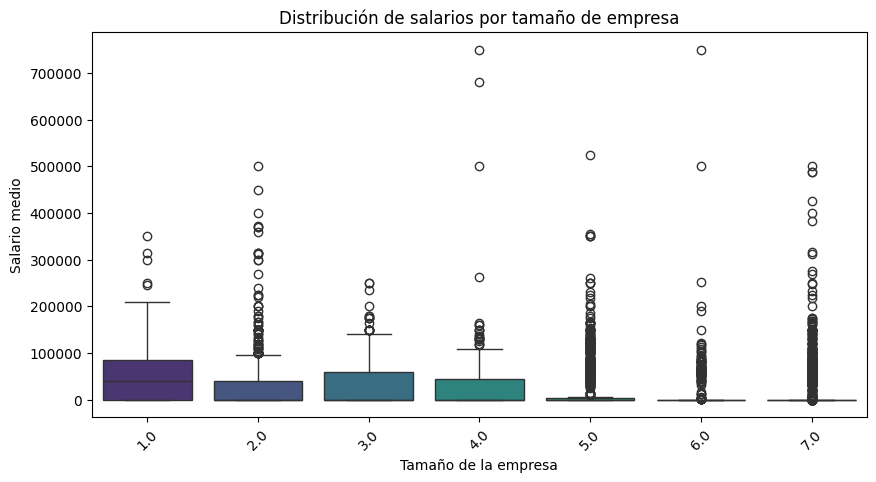

In [159]:
df_merged = df_postings.merge(df_companies, left_on='company_id', right_on='company_id', how='left')

#setting the colors
colors = sns.color_palette('viridis', 7)


# Plotting the boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x='company_size', y='med_salary', data=df_merged,palette=colors)
plt.title('Distribución de salarios por tamaño de empresa')
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Salario medio')
plt.xticks(rotation=45)
plt.show()

La mediana de los salarios no varía significativamente entre diferentes tamaños de empresa.
Hay muchos valores atípicos, lo que indica que algunos empleados en empresas de cualquier tamaño pueden recibir salarios considerablemente más altos.
Aunque se podría esperar que empresas más grandes pagaran mejor, este gráfico sugiere que la variabilidad dentro de cada grupo es alta y que el tamaño de la empresa no es necesariamente un indicador claro del salario.

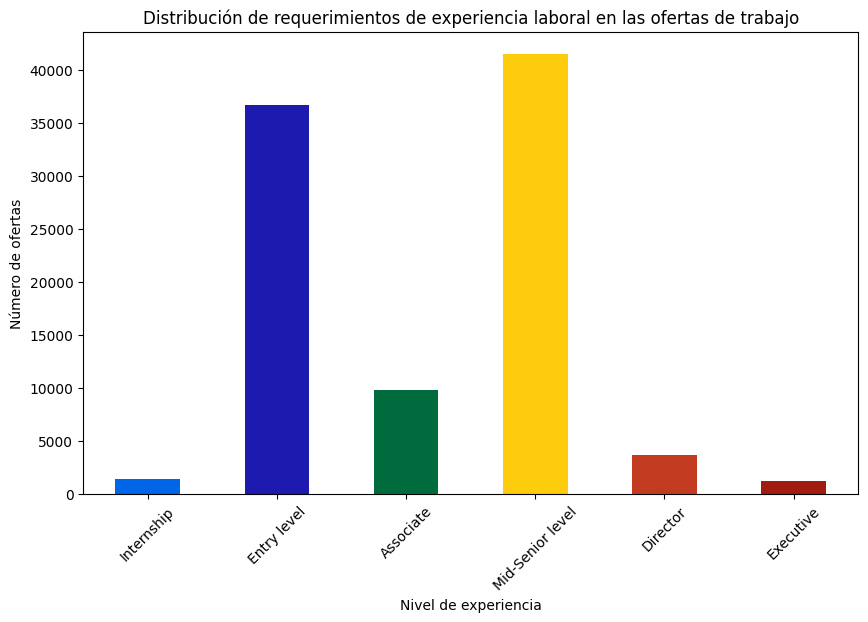

In [153]:

experience_level_distribution = df_postings['formatted_experience_level'].value_counts()

custom_order = ['Internship', 'Entry level', 'Associate', 'Mid-Senior level', 'Director', 'Executive']

experience_level_distribution = experience_level_distribution.reindex(custom_order)

#Dict of colors for each experience level
experience_colors = {
    'Entry level': '#1c1aaf',
    'Associate': '#006b3d',
    'Mid-Senior level': '#fdcc0c',
    'Director': '#c23b21',
    'Not Applicable': '#888888',
    'Internship': '#0066e7',
    'Executive': '#a11c0f'
}

# Define base colors (can be any color scheme)
base_colors = [experience_colors.get(level) for level in experience_level_distribution.index]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
experience_level_distribution.plot(kind='bar', color=base_colors)
plt.title('Distribución de requerimientos de experiencia laboral en las ofertas de trabajo')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Número de ofertas')
plt.xticks(rotation=45)
plt.show()

La mayoría de las ofertas de empleo están dirigidas a personas con experiencia media o en su primer empleo, lo que sugiere una alta demanda en estos niveles.
Las oportunidades para roles directivos o ejecutivos son mucho más limitadas, lo cual es esperable, ya que estos puestos requieren más experiencia y son menos comunes.
Las pasantías (Internship) son escasas, lo que podría indicar una menor oferta de oportunidades para estudiantes o recién graduados.
Este patrón sugiere que las empresas buscan principalmente talento joven y personas con experiencia intermedia, mientras que los roles de alto nivel son menos accesibles.

In [ ]:
# Sample Data
companies = ['Google', 'Amazon', 'Microsoft']
job_counts = [120, 150, 100]
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define base colors (can be any color scheme)
base_colors = ['#4CAF50', '#FF9800', '#2196F3'] # Green, Orange, Blue

# Create a gradient effect by layering transparent bars
num_layers = 10 # More layers = smoother gradient
for i in range(num_layers):
    alpha = (i + 1) / num_layers # Increasing opacity
    for j, value in enumerate(job_counts):
        ax.bar(companies[j], value * (i + 1) / num_layers, color=base_colors[j], alpha=alpha, edgecolor='none')

# Labels & Title
plt.xlabel('Company', fontsize=12, fontweight='bold')
plt.ylabel('Number of Job Postings', fontsize=12, fontweight='bold')
plt.title('Job Postings Per Company (Gradient Effect)', fontsize=14, fontweight='bold')

# Format Ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add Grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate Bars
for i, value in enumerate(job_counts):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12, fontweight='bold', color='black')
    
# Remove Borders (Spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [ ]:
#IMPORTANTE: CERRAR LA CONEXIÓN
conn.close()